In [1]:
from getpass import getpass

admin_rdm_url = 'http://localhost:8001/'
idp_name_1 = 'FakeCAS'
default_result_path = None
close_on_fail = False

# 定期監視-管理者-未ログイン

- サブシステム名: 管理者
- ページ/アドオン: 管理者
- 機能分類: 未ログイン
- シナリオ名: ログイン確認
- 用意するテストデータ: URL一覧、アカウント(管理者ユーザー1: GRDM)


## GakuNin RDM管理者ページのURLを開く

①ブラウザを開き、画面右上の設定メニューから「シークレットモードで開く」を選択する。  
②新規画面が開かれ、画面上において、「シークレットモードです」と表示されていることを確認する。
以下、シークレットモードにて確認を行う。

③ブラウザを開き、下記URLにアクセスする。  
https://rdm.example.com/  

In [2]:
import tempfile

work_dir = tempfile.mkdtemp()
if default_result_path is None:
    default_result_path = work_dir
work_dir

'/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpjw_12823'

In [3]:
import importlib
import pandas as pd

import scripts.playwright
importlib.reload(scripts.playwright)

from scripts.playwright import *
from scripts import grdm

await init_pw_context(close_on_fail=close_on_fail, last_path=default_result_path)

('20250809-170327',
 '/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpbn0b72kr')

Start epoch: 1754726607.5194309 seconds


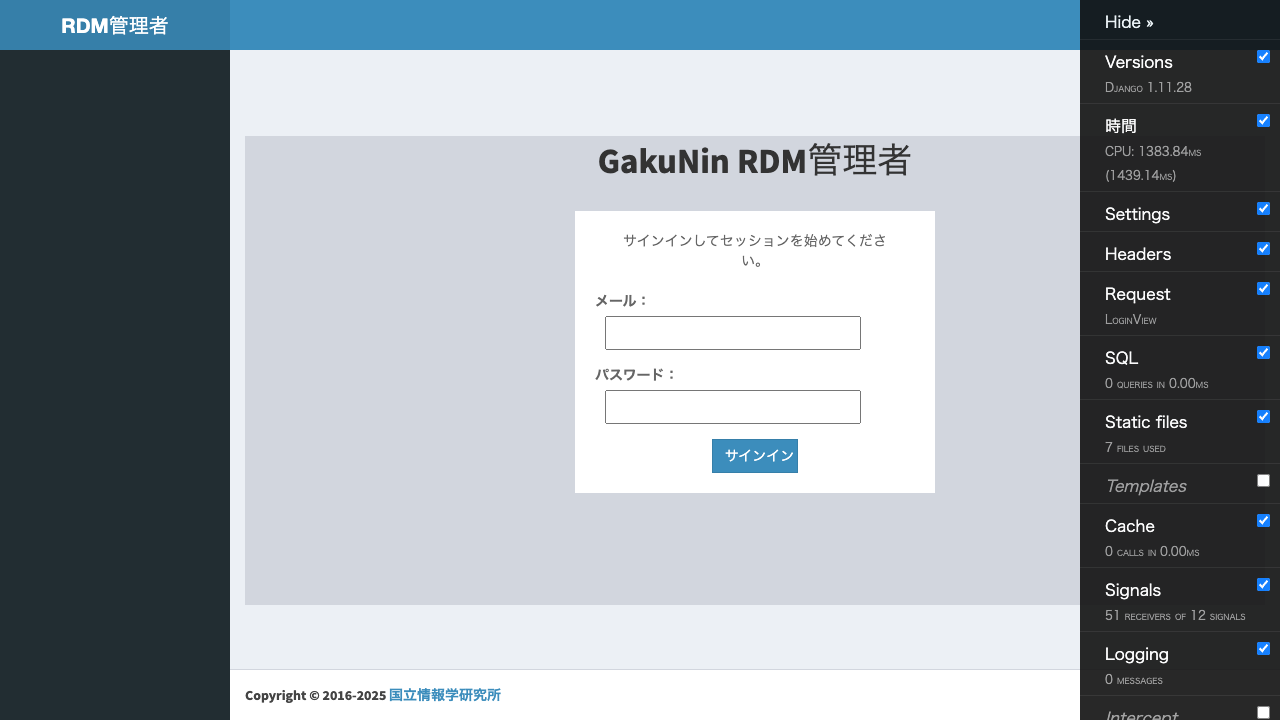

In [4]:
import asyncio
import time

async def _step(page):
    await page.goto(admin_rdm_url)

    await expect(page.locator('.login-logo')).to_be_visible(timeout=30000)
    await asyncio.sleep(3)

await run_pw(_step)

## 左上のRDMをクリックする



Start epoch: 1754726612.5897212 seconds


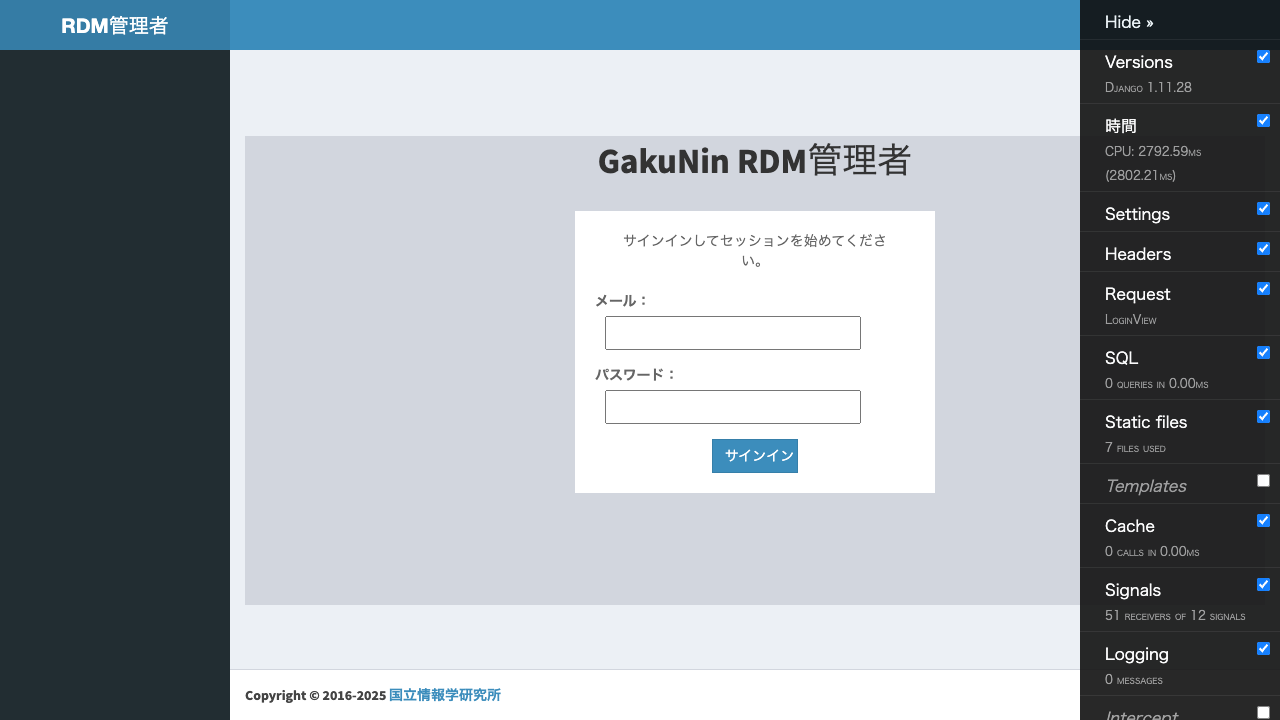

In [5]:
async def _step(page):
    await page.locator('.logo-lg').click()

    await expect(page.locator('.login-logo')).to_be_visible(timeout=30000)
    await asyncio.sleep(3)

await run_pw(_step)

## (非FakeCASの場合) GakuNin Embeded DSのプルダウンを展開する

In [ ]:
async def _step(page):
    if idp_name_1 == 'FakeCAS':
        return
    await page.locator('#dropdown_img').click()

    await asyncio.sleep(1)

await run_pw(_step)

Start epoch: 1754726618.751158 seconds


終了処理を実施。

In [ ]:
await finish_pw_context()

Video: /tmp/tmpct59fel0/video-1.webm
HAR: /tmp/tmpct59fel0/har.zip


In [ ]:
!rm -fr {work_dir}